In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from matplotlib.lines import Line2D

import energy_analysis_helpers

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-xyqem6oy because the default path (/home/sarslan/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
FIG_SIZE = (8,5)
plt.rcParams["figure.figsize"] = FIG_SIZE
FONT_SIZE = 16
LINE_STYLE = (0,(4,4))
LINE_WIDTH = 3.5
SAVE_FIG = False

ENERGY_LIM = (0, 6)
ENERGY_LIM_NO_UDP = (1.4, 2.8)
ENERGY_LIM_NO_UDP_NO_BBR2 = (1.4, 2.2)

In [3]:
EXP_ID = '230511-1257'
data_folder = '../data/' + EXP_ID + '/'
exp_filename = data_folder + 'energy.log'

out_dir = '../outputs/' + EXP_ID + '/'
if (SAVE_FIG):
    if (not os.path.exists(out_dir)):
        os.mkdir(out_dir)

# Reading the Experiment Data

In [4]:
exp_df = energy_analysis_helpers.read_energy_log(exp_filename)
exp_df['energy_J'] = exp_df['energy_uJ'] / 1000000
exp_df['energy_kJ'] = exp_df['energy_J'] / 1000
exp_df = energy_analysis_helpers.read_iperf_log(exp_df, data_folder)
exp_df['power_W'] = exp_df['energy_J'] / exp_df['time_sec']
exp_df_no_udp = exp_df[(exp_df['cc'] != 'udp')].copy()
exp_df_no_udp_no_bbr2 = exp_df[(exp_df['cc'] != 'udp') \
                               & (exp_df['cc'] != 'bbr2')].copy()
exp_df_no_udp_no_bbr2_no_none = exp_df[(exp_df['cc'] != 'udp') \
                                       & (exp_df['cc'] != 'bbr2') \
                                        & (exp_df['cc'] != 'baseline')].copy()
exp_df

,cc,mtu,cnt,energy_uJ,energy_J,energy_kJ,total_cpu_util_percent,user_cpu_util_percent,system_cpu_util_percent,time_sec,sent_bytes,bps,rtx_pkts,min_rtt,mean_rtt,max_rtt,max_cwnd,power_W
0,udp,1500,1,5.301391e+09,5301.391275,5.301391,80.426079,19.336575,61.089503,94.128428,53687092008,4.562893e+09,NaN,NaN,NaN,NaN,NaN,56.320831
1,udp,1500,2,5.232915e+09,5232.915314,5.232915,77.979218,18.978622,59.000595,95.599893,53687092008,4.492655e+09,NaN,NaN,NaN,NaN,NaN,54.737669
2,udp,1500,3,4.504067e+09,4504.067267,4.504067,88.179867,21.257274,66.922592,81.386496,53687092008,5.277257e+09,NaN,NaN,NaN,NaN,NaN,55.341703
3,udp,1500,4,4.821466e+09,4821.466417,4.821466,85.120456,20.341678,64.778774,86.386276,53687092008,4.971827e+09,NaN,NaN,NaN,NaN,NaN,55.812875
4,udp,1500,5,5.069874e+09,5069.874045,5.069874,86.256166,19.572797,66.683368,90.743231,53687092008,4.733106e+09,NaN,NaN,NaN,NaN,NaN,55.870548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,highspeed,9000,16,1.498434e+09,1498.433725,1.498434,30.478618,1.312862,29.165758,43.397293,53687222272,9.896879e+09,4222.0,1.330,1.330,1.330,1637484.0,34.528276
869,highspeed,9000,17,1.503330e+09,1503.329952,1.503330,30.935328,1.294604,29.640726,43.390395,53687091200,9.898429e+09,3450.0,1.416,1.416,1.416,1780652.0,34.646607
870,highspeed,9000,18,1.481979e+09,1481.978934,1.481979,27.055601,1.243711,25.811888,43.391734,53687091200,9.898123e+09,3654.0,1.344,1.344,1.344,1073760.0,34.153485
871,highspeed,9000,19,1.482374e+09,1482.374319,1.482374,26.700359,1.091406,25.608951,43.394238,53687091200,9.897552e+09,3669.0,1.166,1.166,1.166,1476420.0,34.160626


# Overall Energy Consumption vs CCA and MTU

In [5]:
print('========== Average Energy Consumption (J) ==========')
print(exp_df.groupby(['cc', 'mtu'])['energy_J'].mean().unstack().sort_values([1500]))
print('\n====== St. Deviation in Energy Consumption (J) =====')
print(exp_df.groupby(['cc', 'mtu'])['energy_J'].std().unstack().sort_values([1500]))

========== Average Energy Consumption (J) ==========
mtu               1500         3000         6000         9000
cc                                                           
bbr        1753.339789  1606.136116  1544.135366  1517.887755
westwood   1811.171410  1607.409917  1529.291825  1510.228809
highspeed  1812.705031  1596.287280  1531.624491  1513.056411
scalable   1824.562065  1594.182732  1531.055607  1511.250651
reno       1839.246509  1613.645655  1532.747391  1504.026390
vegas      1857.210295  1601.415297  1526.245885  1499.172432
dctcp      1875.224107  1606.721628  1530.867840  1514.495079
cubic      1875.962873  1598.465604  1534.674471  1512.930380
baseline   2043.302218  1822.324586  1727.747783  1665.822545
bbr2       2455.386799  2048.061813  1747.427268  1672.095036
udp        4899.109278  3461.093794  2021.545624  2341.039918

====== St. Deviation in Energy Consumption (J) =====
mtu              1500        3000        6000        9000
cc                           

In [6]:
print('========== Average Power (W) ==========')
print(exp_df.groupby(['cc', 'mtu'])['power_W'].mean().unstack().sort_values([1500]))

========== Average Power (W) ==========
mtu             1500       3000       6000       9000
cc                                                   
bbr2       35.263555  34.725994  35.019561  34.585216
baseline   37.235939  36.754634  35.712145  34.414422
bbr        37.614504  35.708726  34.863252  34.455979
scalable   38.933650  35.984830  35.070393  34.786434
vegas      39.284186  36.173537  34.995056  34.542418
westwood   39.317564  36.306963  35.053753  34.780776
highspeed  39.335380  36.049255  35.105526  34.852495
reno       39.339363  36.452034  35.143431  34.657093
cubic      39.788803  36.087607  35.184524  34.865159
dctcp      40.207009  36.275188  35.092306  34.898220
udp        55.399230  45.762492  34.711048  33.817142


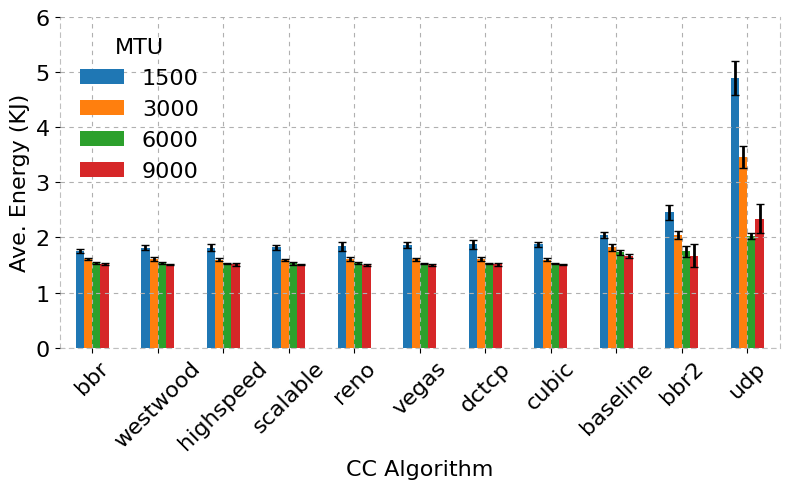

In [7]:
# plt.figure(figsize=FIG_SIZE)
exp_df.groupby(['cc', 'mtu'])['energy_kJ'].mean().unstack().sort_values([1500]).plot.bar(
    yerr=exp_df.groupby(['cc', 'mtu'])['energy_kJ'].std().unstack(), 
    error_kw=dict(lw=2, capsize=3, capthick=1, ecolor='black')
    )

plt.xlabel('CC Algorithm', fontsize=FONT_SIZE)
plt.ylabel('Ave. Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim(ENERGY_LIM)
plt.xticks(rotation = 45)
plt.grid(linestyle=LINE_STYLE)
leg = plt.gca().legend(loc='upper left', frameon=False, 
                 title='MTU', fontsize=FONT_SIZE)
plt.setp(leg.get_title(),fontsize=FONT_SIZE)
plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["top"].set_linestyle(LINE_STYLE)
# plt.gca().spines["top"].set_alpha(0.5)
# plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/cca_energy.pdf')

plt.show()

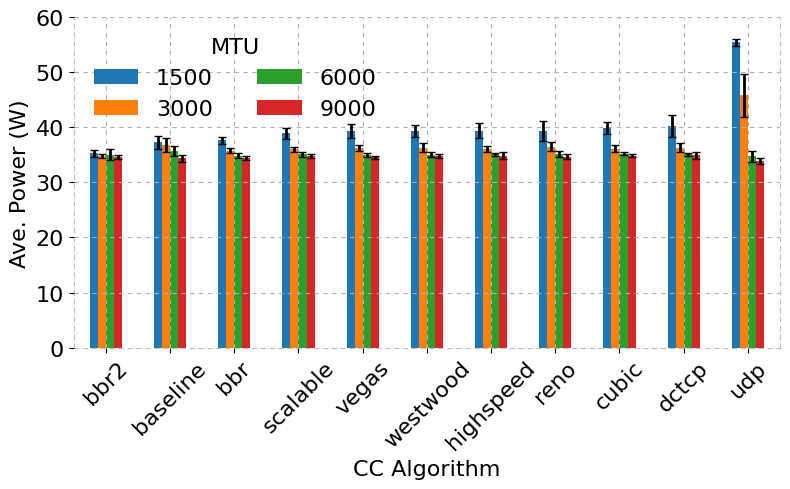

In [8]:
# plt.figure(figsize=FIG_SIZE)
exp_df.groupby(['cc', 'mtu'])['power_W'].mean().unstack().sort_values([1500]).plot.bar(
    yerr=exp_df.groupby(['cc', 'mtu'])['power_W'].std().unstack(), 
    error_kw=dict(lw=2, capsize=3, capthick=1, ecolor='black')
    )

plt.xlabel('CC Algorithm', fontsize=FONT_SIZE)
plt.ylabel('Ave. Power (W)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim((0,60))
plt.xticks(rotation = 45)
plt.grid(linestyle=LINE_STYLE)
leg = plt.gca().legend(loc='upper left', frameon=False, 
                 title='MTU', fontsize=FONT_SIZE, ncol=2)
plt.setp(leg.get_title(),fontsize=FONT_SIZE)
plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["top"].set_linestyle(LINE_STYLE)
# plt.gca().spines["top"].set_alpha(0.5)
# plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/cca_energy_per_sec.pdf')

plt.show()

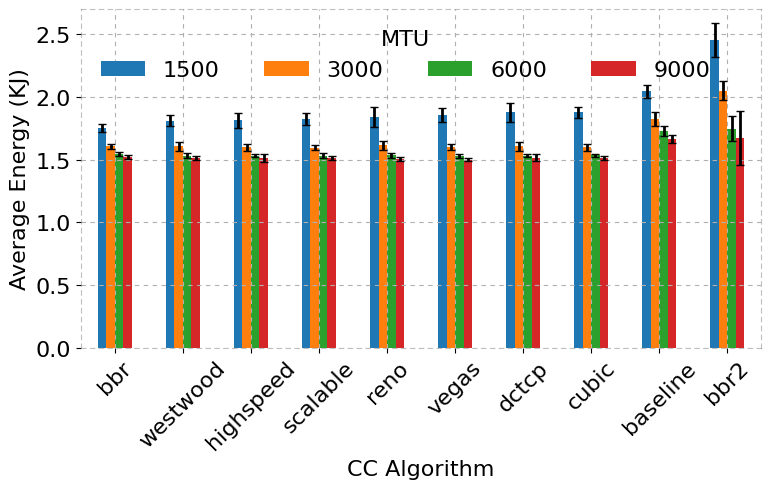

In [9]:
# plt.figure(figsize=FIG_SIZE)
exp_df_no_udp.groupby(['cc', 'mtu'])['energy_kJ'].mean().unstack().sort_values([1500]).plot.bar(
    yerr=exp_df_no_udp.groupby(['cc', 'mtu'])['energy_kJ'].std().unstack(), 
    error_kw=dict(lw=2, capsize=3, capthick=1, ecolor='black')
    )

plt.xlabel('CC Algorithm', fontsize=FONT_SIZE)
plt.ylabel('Average Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim((0, 2.7))
plt.xticks(rotation = 45)
plt.grid(linestyle=LINE_STYLE)
leg = plt.gca().legend(loc='upper left', frameon=False, 
                 title='MTU', fontsize=FONT_SIZE, ncol=4)
plt.setp(leg.get_title(),fontsize=FONT_SIZE)
plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
# plt.gca().spines["top"].set_visible(False)
plt.gca().spines["top"].set_linestyle(LINE_STYLE)
plt.gca().spines["top"].set_alpha(0.5)
plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/cca_energy_no_udp.pdf')

plt.show()

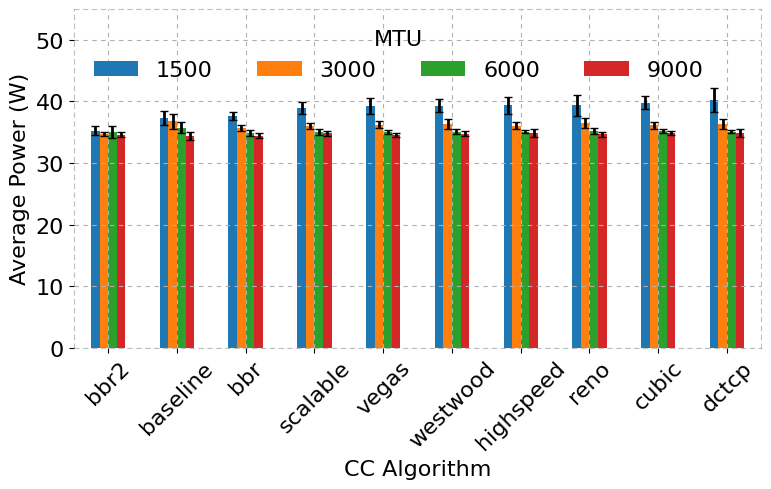

In [10]:
# plt.figure(figsize=FIG_SIZE)
exp_df_no_udp.groupby(['cc', 'mtu'])['power_W'].mean().unstack().sort_values([1500]).plot.bar(
    yerr=exp_df.groupby(['cc', 'mtu'])['power_W'].std().unstack(), 
    error_kw=dict(lw=2, capsize=3, capthick=1, ecolor='black')
    )

plt.xlabel('CC Algorithm', fontsize=FONT_SIZE)
plt.ylabel('Average Power (W)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim((0,55))
plt.xticks(rotation = 45)
plt.grid(linestyle=LINE_STYLE)
leg = plt.gca().legend(loc='upper left', frameon=False, 
                 title='MTU', fontsize=FONT_SIZE, ncol=4)
plt.setp(leg.get_title(),fontsize=FONT_SIZE)
plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
# plt.gca().spines["top"].set_visible(False)
plt.gca().spines["top"].set_linestyle(LINE_STYLE)
plt.gca().spines["top"].set_alpha(0.5)
plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/cca_energy_per_sec_no_udp.pdf')

plt.show()

# Comparing Energy consumption to Iperf Stats

In [11]:
stats_to_corr = ['total_cpu_util_percent', 'user_cpu_util_percent', 
                 'system_cpu_util_percent', 'time_sec', 'sent_bytes', 'bps', 
                 'rtx_pkts', 'min_rtt', 'mean_rtt', 'max_rtt', 'max_cwnd']

print('==== Correlation between Energy Consumption and Iperf Stats ====')
for stat_to_corr in stats_to_corr:
    print('{:>31}: {:.3f}'.format(stat_to_corr, 
                                  exp_df['energy_J'].corr(exp_df[stat_to_corr])))

==== Correlation between Energy Consumption and Iperf Stats ====
         total_cpu_util_percent: 0.722
          user_cpu_util_percent: 0.864
        system_cpu_util_percent: 0.557
                       time_sec: 0.926
                     sent_bytes: -0.075
                            bps: -0.871
                       rtx_pkts: 0.267
                        min_rtt: -0.503
                       mean_rtt: -0.499
                        max_rtt: -0.495
                       max_cwnd: 0.068


In [12]:
print('==== Correlation between Energy Consumption and TCP Iperf Stats ====')
for stat_to_corr in stats_to_corr:
    print('{:>31}: {:.3f}'.format(stat_to_corr, 
                                  exp_df_no_udp['energy_J'].corr(exp_df_no_udp[stat_to_corr])))

==== Correlation between Energy Consumption and TCP Iperf Stats ====
         total_cpu_util_percent: 0.350
          user_cpu_util_percent: -0.633
        system_cpu_util_percent: 0.358
                       time_sec: 0.902
                     sent_bytes: -0.052
                            bps: -0.921
                       rtx_pkts: 0.267
                        min_rtt: -0.503
                       mean_rtt: -0.499
                        max_rtt: -0.495
                       max_cwnd: 0.068


In [13]:
print('==== Correlation between Energy Consumption and TCP Iperf Stats (No BBR2) ====')
for stat_to_corr in stats_to_corr:
    print('{:>31}: {:.3f}'.format(stat_to_corr, 
                                  exp_df_no_udp_no_bbr2['energy_J'].corr(exp_df_no_udp_no_bbr2[stat_to_corr])))

==== Correlation between Energy Consumption and TCP Iperf Stats (No BBR2) ====
         total_cpu_util_percent: 0.856
          user_cpu_util_percent: -0.763
        system_cpu_util_percent: 0.860
                       time_sec: 0.845
                     sent_bytes: -0.019
                            bps: -0.865
                       rtx_pkts: 0.470
                        min_rtt: -0.383
                       mean_rtt: -0.383
                        max_rtt: -0.383
                       max_cwnd: 0.182


In [14]:
print('==== Correlation between Energy Consumption and TCP Iperf Stats (No BBR2 and None) ====')
for stat_to_corr in stats_to_corr:
    print('{:>31}: {:.3f}'.format(stat_to_corr, 
                                  exp_df_no_udp_no_bbr2_no_none['energy_J'].corr(exp_df_no_udp_no_bbr2_no_none[stat_to_corr])))

==== Correlation between Energy Consumption and TCP Iperf Stats (No BBR2 and None) ====
         total_cpu_util_percent: 0.842
          user_cpu_util_percent: -0.684
        system_cpu_util_percent: 0.846
                       time_sec: 0.935
                     sent_bytes: -0.008
                            bps: -0.936
                       rtx_pkts: 0.380
                        min_rtt: -0.445
                       mean_rtt: -0.445
                        max_rtt: -0.445
                       max_cwnd: -0.450


In [51]:
print('==== Correlation between Power Consumption and TCP Iperf Stats (No BBR2 and None) ====')
for stat_to_corr in stats_to_corr:
    print('{:>31}: {:.3f}'.format(stat_to_corr, 
                                  exp_df_no_udp_no_bbr2_no_none['power_W'].corr(exp_df_no_udp_no_bbr2_no_none[stat_to_corr])))

==== Correlation between Power Consumption and TCP Iperf Stats (No BBR2 and None) ====
         total_cpu_util_percent: 0.850
          user_cpu_util_percent: -0.642
        system_cpu_util_percent: 0.854
                       time_sec: 0.852
                     sent_bytes: -0.014
                            bps: -0.854
                       rtx_pkts: 0.349
                        min_rtt: -0.359
                       mean_rtt: -0.359
                        max_rtt: -0.359
                       max_cwnd: -0.362


In [15]:
mtus = exp_df['mtu'].unique()
n_colors = len(mtus)
bins = [mtus[0]-(mtus[1]-mtus[0])/2]
for i in range(len(mtus)):
    bins.append(2*mtus[i]-bins[-1]) 
cmap = matplotlib.colormaps['tab20b'].resampled(n_colors)
norm = matplotlib.colors.BoundaryNorm(boundaries=bins, ncolors=n_colors)

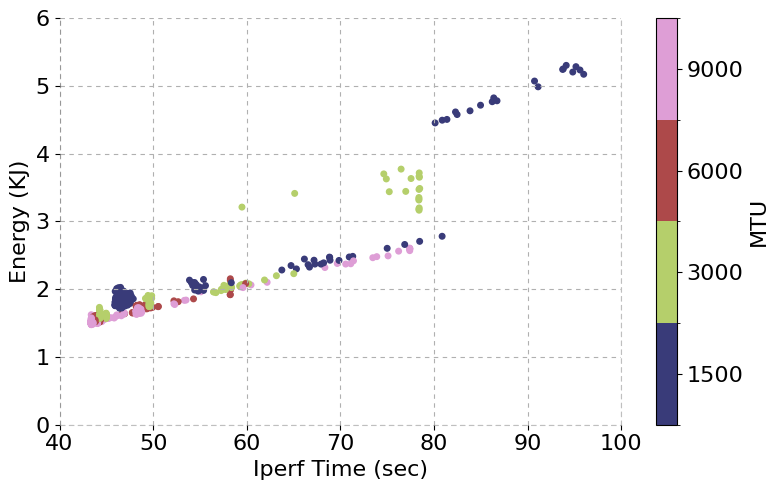

In [16]:
exp_df.plot.scatter(y='energy_kJ', x='time_sec', c='mtu', colormap=cmap, norm=norm, s=16)

cbar = plt.get_cmap()
cbar_ax = plt.gcf().get_axes()[-1]
cbar_ax.get_yaxis().set_ticks(mtus)
cbar_ax.set_yticklabels(labels=mtus, fontsize=FONT_SIZE)
cbar_ax.set_ylabel('MTU',size=FONT_SIZE)

plt.xlabel('Iperf Time (sec)', fontsize=FONT_SIZE)
plt.ylabel('Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim(ENERGY_LIM)
plt.xlim((40, 100))
plt.grid(linestyle=LINE_STYLE)
plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["top"].set_linestyle(LINE_STYLE)
# plt.gca().spines["top"].set_alpha(0.5)
# plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_time_per_mtu.pdf')

plt.show()

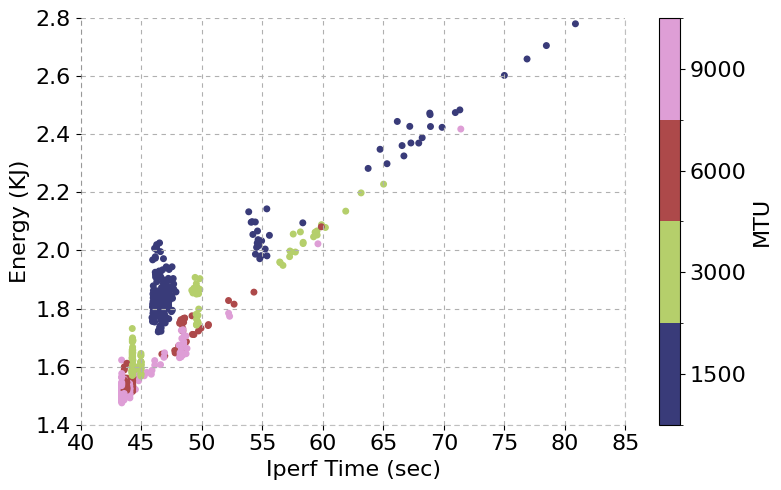

In [17]:
exp_df_no_udp.plot.scatter(y='energy_kJ', x='time_sec', c='mtu', colormap=cmap, norm=norm, s=16)

cbar = plt.get_cmap()
cbar_ax = plt.gcf().get_axes()[-1]
cbar_ax.get_yaxis().set_ticks(mtus)
cbar_ax.set_yticklabels(labels=mtus, fontsize=FONT_SIZE)
cbar_ax.set_ylabel('MTU',size=FONT_SIZE)

plt.xlabel('Iperf Time (sec)', fontsize=FONT_SIZE)
plt.ylabel('Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim(ENERGY_LIM_NO_UDP)
plt.xlim((40, 85))
plt.grid(linestyle=LINE_STYLE)
plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["top"].set_linestyle(LINE_STYLE)
# plt.gca().spines["top"].set_alpha(0.5)
# plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_time_per_mtu_no_udp.pdf')

plt.show()

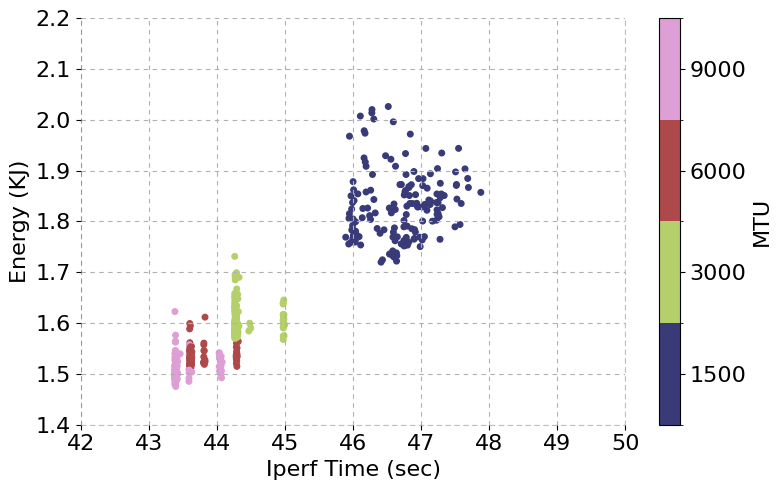

In [18]:
exp_df_no_udp_no_bbr2_no_none.plot.scatter(y='energy_kJ', x='time_sec', c='mtu', colormap=cmap, norm=norm, s=16)

cbar = plt.get_cmap()
cbar_ax = plt.gcf().get_axes()[-1]
cbar_ax.get_yaxis().set_ticks(mtus)
cbar_ax.set_yticklabels(labels=mtus, fontsize=FONT_SIZE)
cbar_ax.set_ylabel('MTU',size=FONT_SIZE)

plt.xlabel('Iperf Time (sec)', fontsize=FONT_SIZE)
plt.ylabel('Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim(ENERGY_LIM_NO_UDP_NO_BBR2)
plt.xlim((42, 50))
plt.grid(linestyle=LINE_STYLE)
plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["top"].set_linestyle(LINE_STYLE)
# plt.gca().spines["top"].set_alpha(0.5)
# plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_time_per_mtu_no_udp_no_bbr2_no_none.pdf')

plt.show()

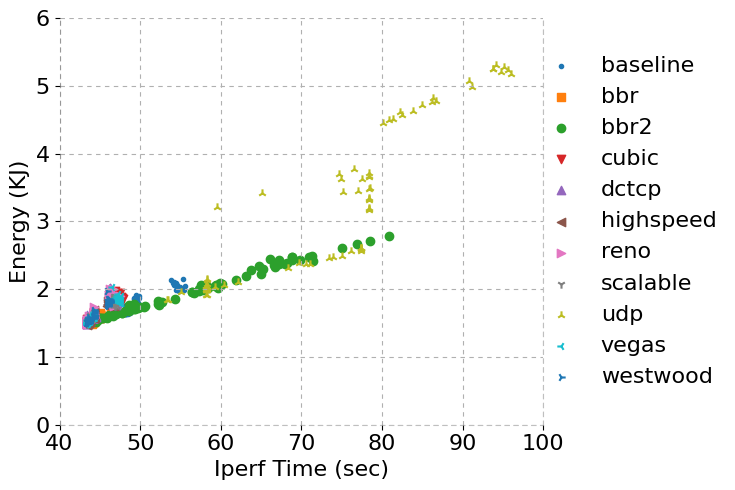

In [19]:
plt.figure(figsize=FIG_SIZE)
marker = 0
for cca, cc_df in exp_df.groupby('cc'):
    plt.scatter(cc_df['time_sec'], cc_df['energy_kJ'], label=cca, 
                marker=list(Line2D.markers.keys())[marker])
    marker += 1

plt.xlabel('Iperf Time (sec)', fontsize=FONT_SIZE)
plt.ylabel('Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim(ENERGY_LIM)
plt.xlim((40, 100))
plt.grid(linestyle=LINE_STYLE)
plt.legend(loc='center right', frameon=False, fontsize=FONT_SIZE, 
           bbox_to_anchor=(1.4, 0.5))

plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["top"].set_linestyle(LINE_STYLE)
# plt.gca().spines["top"].set_alpha(0.5)
# plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_time_per_cca.pdf')

plt.show()

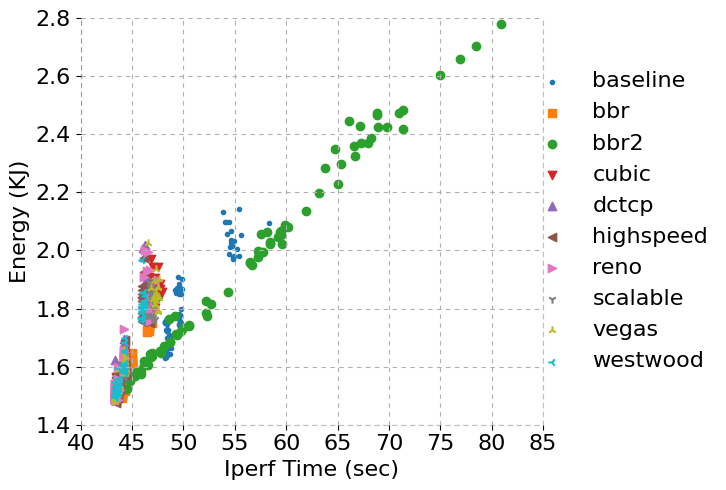

In [20]:
plt.figure(figsize=FIG_SIZE)
marker = 0
for cca, cc_df in exp_df_no_udp.groupby('cc'):
    plt.scatter(cc_df['time_sec'], cc_df['energy_kJ'], label=cca, 
                marker=list(Line2D.markers.keys())[marker])
    marker += 1

plt.xlabel('Iperf Time (sec)', fontsize=FONT_SIZE)
plt.ylabel('Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim(ENERGY_LIM_NO_UDP)
plt.xlim((40, 85))
plt.grid(linestyle=LINE_STYLE)
plt.legend(loc='center right', frameon=False, fontsize=FONT_SIZE, 
           bbox_to_anchor=(1.4, 0.5))

plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["top"].set_linestyle(LINE_STYLE)
# plt.gca().spines["top"].set_alpha(0.5)
# plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_time_per_cca_no_udp.pdf')

plt.show()

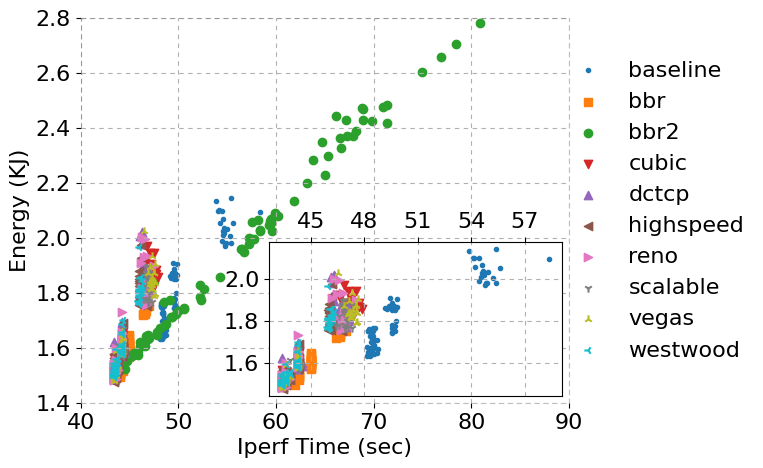

In [21]:
fig, ax = plt.subplots(figsize=(6.3,5))
axins = inset_axes(ax, width="60%", height="40%", loc='lower right')

marker = 0
for cca, cc_df in exp_df_no_udp.groupby('cc'):
    ax.scatter(cc_df['time_sec'], cc_df['energy_kJ'], label=cca, 
                marker=list(Line2D.markers.keys())[marker], 
                color=energy_analysis_helpers.get_next_color(marker))
    if (cca != 'bbr2' and cca != 'none'):
        axins.scatter(cc_df['time_sec'], cc_df['energy_kJ'], 
                      marker=list(Line2D.markers.keys())[marker], 
                      color=energy_analysis_helpers.get_next_color(marker))
    marker += 1

axins.xaxis.tick_top()
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
# axins.set_xlim((43, 48))
axins.xaxis.set_major_locator(ticker.MultipleLocator(base=3))

ax.set_xlabel('Iperf Time (sec)', fontsize=FONT_SIZE)
ax.set_ylabel('Energy (KJ)', fontsize=FONT_SIZE)
ax.tick_params(axis='both', labelsize=FONT_SIZE)
ax.set_ylim(ENERGY_LIM_NO_UDP)
# ax.set_xlim((40, 85))
ax.set_xlim((40,90))
ax.grid(linestyle=LINE_STYLE)
axins.grid(linestyle=LINE_STYLE)
ax.legend(loc='center right', frameon=False, fontsize=FONT_SIZE, 
           bbox_to_anchor=(1.4, 0.5))

ax.spines["right"].set_linestyle(LINE_STYLE)
ax.spines["right"].set_alpha(0.5)
ax.spines["right"].set_color('gray')
ax.spines["left"].set_linestyle(LINE_STYLE)
ax.spines["left"].set_alpha(0.5)
ax.spines["left"].set_color('gray')
ax.spines["top"].set_linestyle(LINE_STYLE)
ax.spines["top"].set_alpha(0.5)
ax.spines["top"].set_color('gray')
ax.spines["bottom"].set_linestyle(LINE_STYLE)
ax.spines["bottom"].set_alpha(0.5)
ax.spines["bottom"].set_color('gray')
# fig.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_time_per_cca_no_udp_with_zoom.pdf',
                bbox_inches='tight')

plt.show()

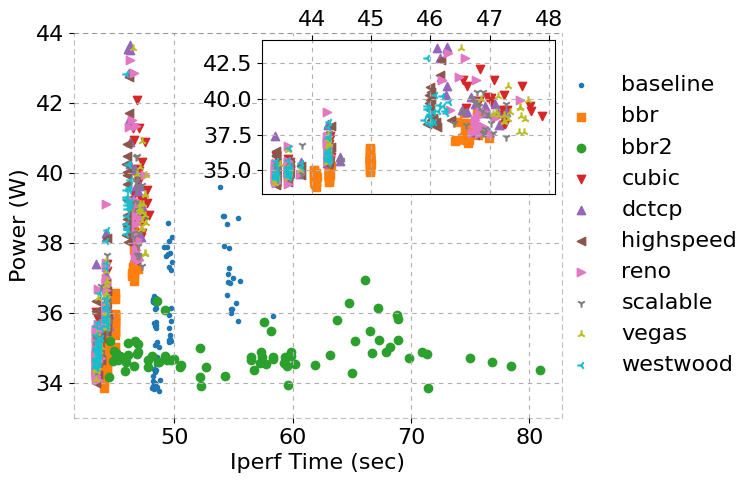

In [50]:
fig, ax = plt.subplots(figsize=(6.3,5))
axins = inset_axes(ax, width="60%", height="40%", loc='upper right')

marker = 0
for cca, cc_df in exp_df_no_udp.groupby('cc'):
    ax.scatter(cc_df['time_sec'], cc_df['power_W'], label=cca, 
                marker=list(Line2D.markers.keys())[marker], 
                color=energy_analysis_helpers.get_next_color(marker))
    if (cca != 'bbr2' and cca != 'baseline'):
        axins.scatter(cc_df['time_sec'], cc_df['power_W'], 
                      marker=list(Line2D.markers.keys())[marker], 
                      color=energy_analysis_helpers.get_next_color(marker))
    marker += 1

axins.xaxis.tick_top()
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
# axins.set_xlim((43, 48))
# axins.xaxis.set_major_locator(ticker.MultipleLocator(base=1))

ax.set_xlabel('Iperf Time (sec)', fontsize=FONT_SIZE)
ax.set_ylabel('Power (W)', fontsize=FONT_SIZE)
ax.tick_params(axis='both', labelsize=FONT_SIZE)
ax.set_ylim((33,44))
# ax.set_xlim((40, 60))
# ax.set_xlim((40,90))
ax.grid(linestyle=LINE_STYLE)
axins.grid(linestyle=LINE_STYLE)
ax.legend(loc='center right', frameon=False, fontsize=FONT_SIZE, 
           bbox_to_anchor=(1.4, 0.5))

ax.spines["right"].set_linestyle(LINE_STYLE)
ax.spines["right"].set_alpha(0.5)
ax.spines["right"].set_color('gray')
ax.spines["left"].set_linestyle(LINE_STYLE)
ax.spines["left"].set_alpha(0.5)
ax.spines["left"].set_color('gray')
ax.spines["top"].set_linestyle(LINE_STYLE)
ax.spines["top"].set_alpha(0.5)
ax.spines["top"].set_color('gray')
ax.spines["bottom"].set_linestyle(LINE_STYLE)
ax.spines["bottom"].set_alpha(0.5)
ax.spines["bottom"].set_color('gray')
# fig.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/power_vs_time_per_cca_no_udp_with_zoom.pdf',
                bbox_inches='tight')

plt.show()

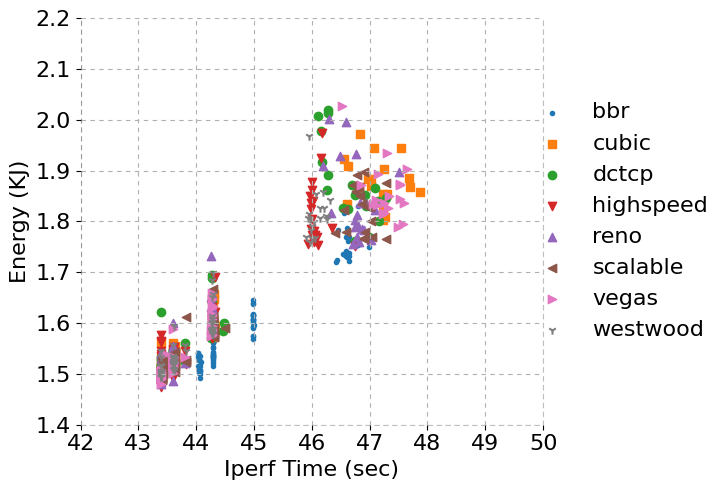

In [23]:
plt.figure(figsize=FIG_SIZE)
marker = 0
for cca, cc_df in exp_df_no_udp_no_bbr2_no_none.groupby('cc'):
    plt.scatter(cc_df['time_sec'], cc_df['energy_kJ'], label=cca, 
                marker=list(Line2D.markers.keys())[marker])
    marker += 1

plt.xlabel('Iperf Time (sec)', fontsize=FONT_SIZE)
plt.ylabel('Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim(ENERGY_LIM_NO_UDP_NO_BBR2)
plt.xlim((42, 50))
plt.grid(linestyle=LINE_STYLE)
plt.legend(loc='center right', frameon=False, fontsize=FONT_SIZE, 
           bbox_to_anchor=(1.4, 0.5))

plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["top"].set_linestyle(LINE_STYLE)
# plt.gca().spines["top"].set_alpha(0.5)
# plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_time_per_cca_no_udp_no_bbr_no_none.pdf')

plt.show()

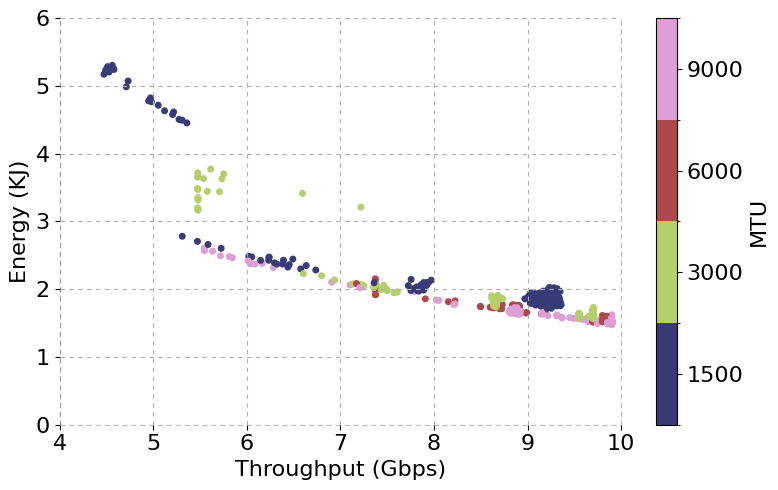

In [24]:
exp_df['gbps'] = exp_df['bps'] * 1e-9
exp_df.plot.scatter(y='energy_kJ', x='gbps', c='mtu', colormap=cmap, norm=norm, s=16)

cbar = plt.get_cmap()
cbar_ax = plt.gcf().get_axes()[-1]
cbar_ax.get_yaxis().set_ticks(mtus)
cbar_ax.set_yticklabels(labels=mtus, fontsize=FONT_SIZE)
cbar_ax.set_ylabel('MTU',size=FONT_SIZE)

plt.xlabel('Throughput (Gbps)', fontsize=FONT_SIZE)
plt.ylabel('Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim(ENERGY_LIM)
plt.xlim((4, 10))
plt.grid(linestyle=LINE_STYLE)
plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["top"].set_linestyle(LINE_STYLE)
# plt.gca().spines["top"].set_alpha(0.5)
# plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_bps_per_mtu.pdf')

plt.show()

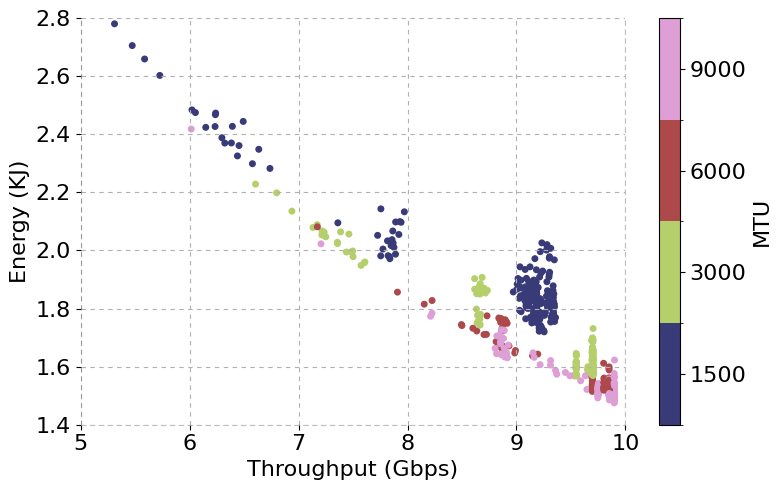

In [25]:
exp_df_no_udp['gbps'] = exp_df_no_udp['bps'] * 1e-9
exp_df_no_udp.plot.scatter(y='energy_kJ', x='gbps', c='mtu', colormap=cmap, norm=norm, s=16)

cbar = plt.get_cmap()
cbar_ax = plt.gcf().get_axes()[-1]
cbar_ax.get_yaxis().set_ticks(mtus)
cbar_ax.set_yticklabels(labels=mtus, fontsize=FONT_SIZE)
cbar_ax.set_ylabel('MTU',size=FONT_SIZE)

plt.xlabel('Throughput (Gbps)', fontsize=FONT_SIZE)
plt.ylabel('Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim(ENERGY_LIM_NO_UDP)
plt.xlim((5, 10))
plt.grid(linestyle=LINE_STYLE)
plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["top"].set_linestyle(LINE_STYLE)
# plt.gca().spines["top"].set_alpha(0.5)
# plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_bps_per_mtu_no_udp.pdf')

plt.show()

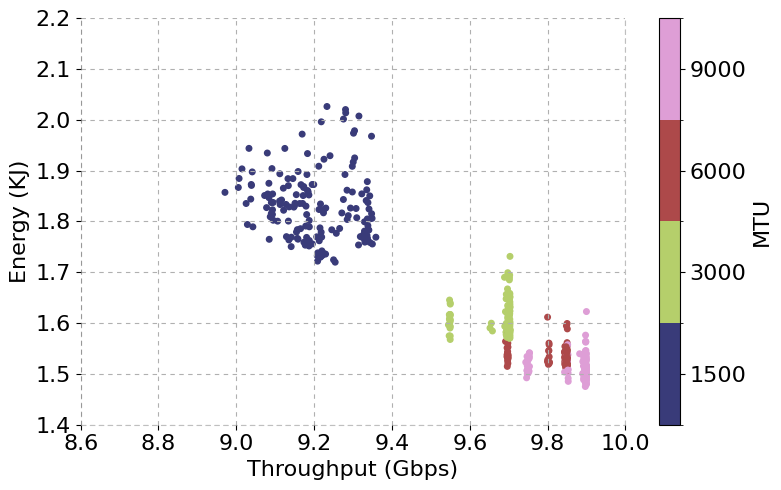

In [26]:
exp_df_no_udp_no_bbr2_no_none['gbps'] = exp_df_no_udp_no_bbr2_no_none['bps'] * 1e-9
exp_df_no_udp_no_bbr2_no_none.plot.scatter(y='energy_kJ', x='gbps', c='mtu', colormap=cmap, norm=norm, s=16)

cbar = plt.get_cmap()
cbar_ax = plt.gcf().get_axes()[-1]
cbar_ax.get_yaxis().set_ticks(mtus)
cbar_ax.set_yticklabels(labels=mtus, fontsize=FONT_SIZE)
cbar_ax.set_ylabel('MTU',size=FONT_SIZE)

plt.xlabel('Throughput (Gbps)', fontsize=FONT_SIZE)
plt.ylabel('Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim(ENERGY_LIM_NO_UDP_NO_BBR2)
plt.xlim((8.6, 10))
plt.grid(linestyle=LINE_STYLE)
plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["top"].set_linestyle(LINE_STYLE)
# plt.gca().spines["top"].set_alpha(0.5)
# plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_bps_per_mtu_no_udp_no_bbr2.pdf')

plt.show()

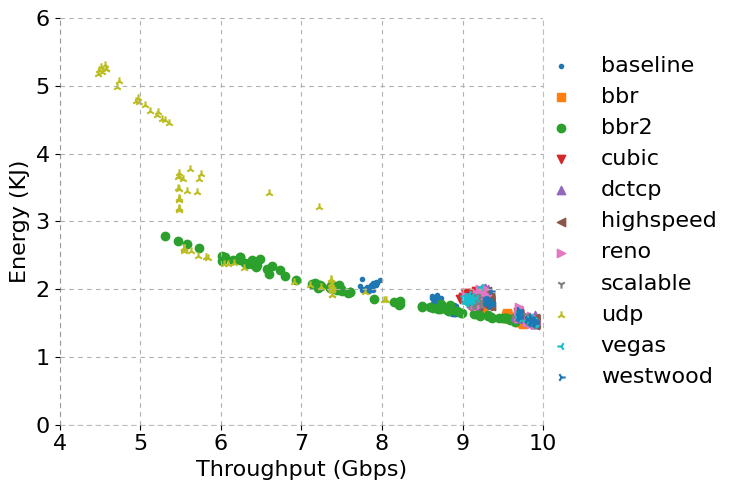

In [27]:
plt.figure(figsize=FIG_SIZE)
marker = 0
for cca, cc_df in exp_df.groupby('cc'):
    plt.scatter(cc_df['gbps'], cc_df['energy_kJ'], label=cca, 
                marker=list(Line2D.markers.keys())[marker])
    marker += 1

plt.xlabel('Throughput (Gbps)', fontsize=FONT_SIZE)
plt.ylabel('Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim(ENERGY_LIM)
plt.xlim((4, 10))
plt.grid(linestyle=LINE_STYLE)
plt.legend(loc='center right', frameon=False, fontsize=FONT_SIZE, 
           bbox_to_anchor=(1.4, 0.5))

plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["top"].set_linestyle(LINE_STYLE)
# plt.gca().spines["top"].set_alpha(0.5)
# plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_bps_per_cca.pdf')

plt.show()

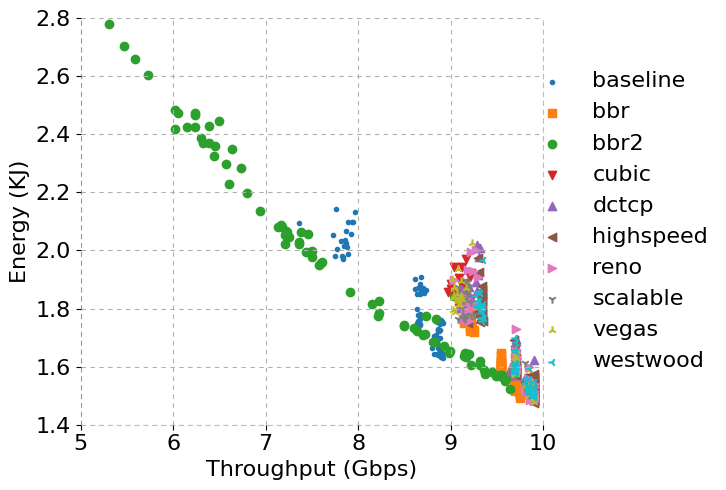

In [28]:
plt.figure(figsize=FIG_SIZE)
marker = 0
for cca, cc_df in exp_df_no_udp.groupby('cc'):
    plt.scatter(cc_df['gbps'], cc_df['energy_kJ'], label=cca, 
                marker=list(Line2D.markers.keys())[marker])
    marker += 1

plt.xlabel('Throughput (Gbps)', fontsize=FONT_SIZE)
plt.ylabel('Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim(ENERGY_LIM_NO_UDP)
plt.xlim((5, 10))
plt.grid(linestyle=LINE_STYLE)
plt.legend(loc='center right', frameon=False, fontsize=FONT_SIZE, 
           bbox_to_anchor=(1.4, 0.5))

plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["top"].set_linestyle(LINE_STYLE)
# plt.gca().spines["top"].set_alpha(0.5)
# plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_bps_per_cca_no_udp.pdf')

plt.show()

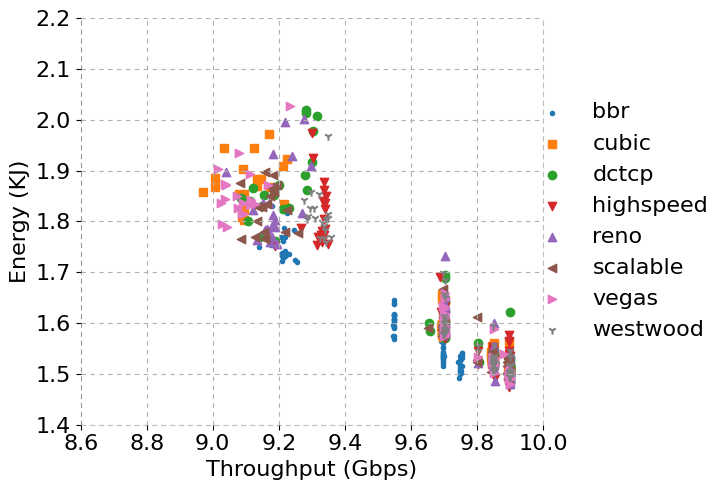

In [29]:
plt.figure(figsize=FIG_SIZE)
marker = 0
for cca, cc_df in exp_df_no_udp_no_bbr2_no_none.groupby('cc'):
    plt.scatter(cc_df['gbps'], cc_df['energy_kJ'], label=cca, 
                marker=list(Line2D.markers.keys())[marker])
    marker += 1

plt.xlabel('Throughput (Gbps)', fontsize=FONT_SIZE)
plt.ylabel('Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim(ENERGY_LIM_NO_UDP_NO_BBR2)
plt.xlim((8.6, 10))
plt.grid(linestyle=LINE_STYLE)
plt.legend(loc='center right', frameon=False, fontsize=FONT_SIZE, 
           bbox_to_anchor=(1.4, 0.5))

plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["top"].set_linestyle(LINE_STYLE)
# plt.gca().spines["top"].set_alpha(0.5)
# plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_bps_per_cca_no_udp_no_bbr2_no_none.pdf')

plt.show()

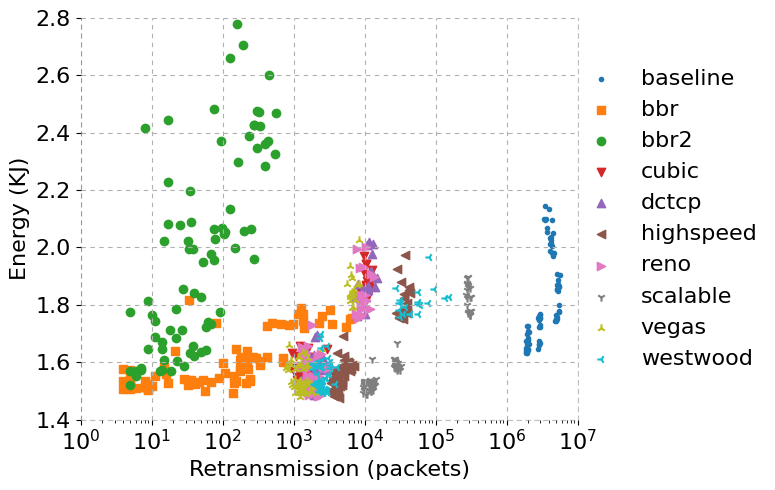

In [30]:
plt.figure(figsize=(8.5,5))
marker = 0
for cca, cc_df in exp_df.groupby('cc'):
    if (cca == 'udp'):
        continue
    plt.scatter(cc_df['rtx_pkts'], cc_df['energy_kJ'], label=cca, 
                marker=list(Line2D.markers.keys())[marker])
    marker += 1

plt.xlabel('Retransmission (packets)', fontsize=FONT_SIZE)
plt.ylabel('Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim(ENERGY_LIM_NO_UDP)
plt.xscale('log')
plt.xlim((1, 1e7))
plt.grid(linestyle=LINE_STYLE)
plt.legend(loc='center right', frameon=False, fontsize=FONT_SIZE, 
           bbox_to_anchor=(1.4, 0.5))

plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["top"].set_linestyle(LINE_STYLE)
# plt.gca().spines["top"].set_alpha(0.5)
# plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_rtx_per_cca.pdf',
                bbox_inches='tight')

plt.show()

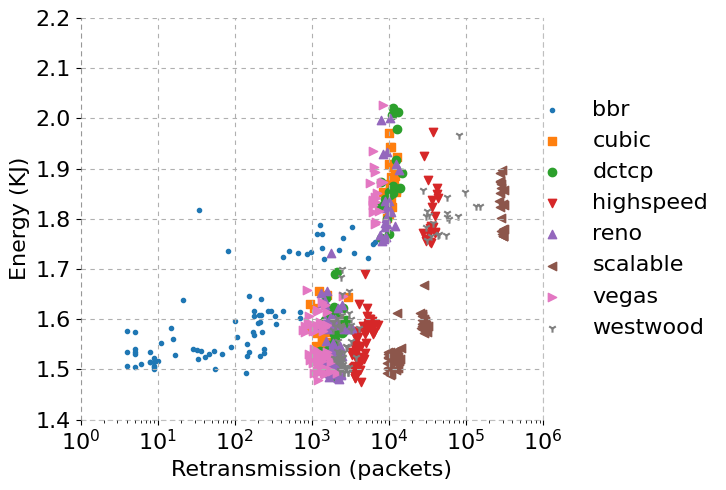

In [31]:
plt.figure(figsize=FIG_SIZE)
marker = 0
for cca, cc_df in exp_df_no_udp_no_bbr2_no_none.groupby('cc'):
    plt.scatter(cc_df['rtx_pkts'], cc_df['energy_kJ'], label=cca, 
                marker=list(Line2D.markers.keys())[marker])
    marker += 1

plt.xlabel('Retransmission (packets)', fontsize=FONT_SIZE)
plt.ylabel('Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim(ENERGY_LIM_NO_UDP_NO_BBR2)
plt.xscale('log')
plt.xlim((1, 1e6))
plt.grid(linestyle=LINE_STYLE)
plt.legend(loc='center right', frameon=False, fontsize=FONT_SIZE, 
           bbox_to_anchor=(1.4, 0.5))

plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["top"].set_linestyle(LINE_STYLE)
# plt.gca().spines["top"].set_alpha(0.5)
# plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_rtx_per_cca_no_bbr2_no_none.pdf')

plt.show()

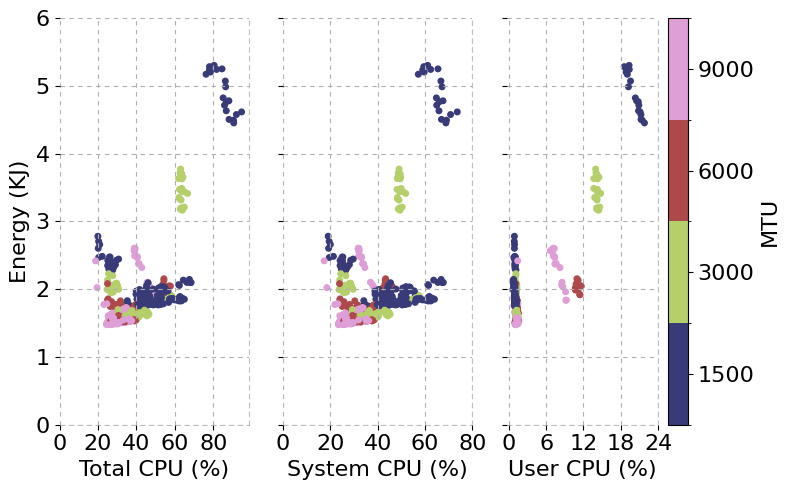

In [32]:
fig, ax = plt.subplots(1, 3)

exp_df.plot.scatter(y='energy_kJ', x='total_cpu_util_percent', c='mtu', 
                    colormap=cmap, norm=norm, s=16, ax=ax[0], colorbar=False)

ax[0].set_ylabel('Energy (KJ)', fontsize=FONT_SIZE)
ax[0].set_xlabel('Total CPU (%)', fontsize=FONT_SIZE)
ax[0].tick_params(axis='x', labelsize=FONT_SIZE)
ax[0].tick_params(axis='y', labelsize=FONT_SIZE)
ax[0].xaxis.set_ticks(np.arange(0, 81, 20))
ax[0].set_ylim(ENERGY_LIM)
ax[0].grid(linestyle=LINE_STYLE)
ax[0].spines["right"].set_linestyle(LINE_STYLE)
ax[0].spines["right"].set_alpha(0.5)
ax[0].spines["right"].set_color('gray')
ax[0].spines["left"].set_visible(False)
# ax[0].spines["left"].set_linestyle(LINE_STYLE)
# ax[0].spines["left"].set_alpha(0.5)
# ax[0].spines["left"].set_color('gray')
ax[0].spines["top"].set_visible(False)
ax[0].spines["bottom"].set_linestyle(LINE_STYLE)
ax[0].spines["bottom"].set_alpha(0.5)
ax[0].spines["bottom"].set_color('gray')

exp_df.plot.scatter(y='energy_kJ', x='system_cpu_util_percent', c='mtu', 
                    colormap=cmap, norm=norm, s=16, ax=ax[1], colorbar=False)

ax[1].set_xlabel('System CPU (%)', fontsize=FONT_SIZE)
ax[1].set_ylabel('')
ax[1].set_yticklabels([])
ax[1].tick_params(axis='x', labelsize=FONT_SIZE)
ax[1].xaxis.set_ticks(np.arange(0, 81, 20))
ax[1].set_ylim(ENERGY_LIM)
ax[1].grid(linestyle=LINE_STYLE)
ax[1].spines["right"].set_linestyle(LINE_STYLE)
ax[1].spines["right"].set_alpha(0.5)
ax[1].spines["right"].set_color('gray')
ax[1].spines["left"].set_visible(False)
# ax[1].spines["left"].set_linestyle(LINE_STYLE)
# ax[1].spines["left"].set_alpha(0.5)
# ax[1].spines["left"].set_color('gray')
ax[1].spines["top"].set_visible(False)
ax[1].spines["bottom"].set_linestyle(LINE_STYLE)
ax[1].spines["bottom"].set_alpha(0.5)
ax[1].spines["bottom"].set_color('gray')

exp_df.plot.scatter(y='energy_kJ', x='user_cpu_util_percent', c='mtu', 
                    colormap=cmap, norm=norm, s=16, ax=ax[2])

ax[2].set_xlabel('User CPU (%)', fontsize=FONT_SIZE)
ax[2].set_ylabel('')
ax[2].set_yticklabels([])

cbar = plt.get_cmap()
cbar_ax = plt.gcf().get_axes()[-1]
cbar_ax.get_yaxis().set_ticks(mtus)
cbar_ax.set_yticklabels(labels=mtus, fontsize=FONT_SIZE)
cbar_ax.set_ylabel('MTU',size=FONT_SIZE)

ax[2].tick_params(axis='x', labelsize=FONT_SIZE)
ax[2].xaxis.set_ticks(np.arange(0, 25, 6))
ax[2].set_ylim(ENERGY_LIM)
ax[2].grid(linestyle=LINE_STYLE)
ax[2].spines["right"].set_linestyle(LINE_STYLE)
ax[2].spines["right"].set_alpha(0.5)
ax[2].spines["right"].set_color('gray')
ax[2].spines["left"].set_visible(False)
# ax[2].spines["left"].set_linestyle(LINE_STYLE)
# ax[2].spines["left"].set_alpha(0.5)
# ax[2].spines["left"].set_color('gray')
ax[2].spines["top"].set_visible(False)
ax[2].spines["bottom"].set_linestyle(LINE_STYLE)
ax[2].spines["bottom"].set_alpha(0.5)
ax[2].spines["bottom"].set_color('gray')

plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_cpu_per_mtu.pdf')

plt.show()


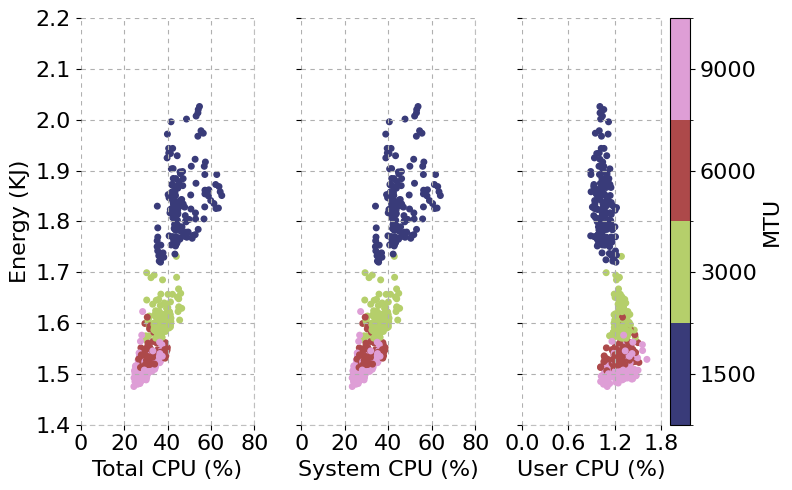

In [33]:
fig, ax = plt.subplots(1, 3)

exp_df_no_udp_no_bbr2_no_none.plot.scatter(y='energy_kJ', x='total_cpu_util_percent', c='mtu', 
                    colormap=cmap, norm=norm, s=16, ax=ax[0], colorbar=False)

ax[0].set_ylabel('Energy (KJ)', fontsize=FONT_SIZE)
ax[0].set_xlabel('Total CPU (%)', fontsize=FONT_SIZE)
ax[0].tick_params(axis='x', labelsize=FONT_SIZE)
ax[0].tick_params(axis='y', labelsize=FONT_SIZE)
ax[0].xaxis.set_ticks(np.arange(0, 81, 20))
ax[0].set_ylim(ENERGY_LIM_NO_UDP_NO_BBR2)
ax[0].grid(linestyle=LINE_STYLE)
ax[0].spines["right"].set_linestyle(LINE_STYLE)
ax[0].spines["right"].set_alpha(0.5)
ax[0].spines["right"].set_color('gray')
ax[0].spines["left"].set_visible(False)
# ax[0].spines["left"].set_linestyle(LINE_STYLE)
# ax[0].spines["left"].set_alpha(0.5)
# ax[0].spines["left"].set_color('gray')
ax[0].spines["top"].set_visible(False)
ax[0].spines["bottom"].set_linestyle(LINE_STYLE)
ax[0].spines["bottom"].set_alpha(0.5)
ax[0].spines["bottom"].set_color('gray')

exp_df_no_udp_no_bbr2_no_none.plot.scatter(y='energy_kJ', x='system_cpu_util_percent', c='mtu', 
                    colormap=cmap, norm=norm, s=16, ax=ax[1], colorbar=False)

ax[1].set_xlabel('System CPU (%)', fontsize=FONT_SIZE)
ax[1].set_ylabel('')
ax[1].set_yticklabels([])
ax[1].tick_params(axis='x', labelsize=FONT_SIZE)
ax[1].xaxis.set_ticks(np.arange(0, 81, 20))
ax[1].set_ylim(ENERGY_LIM_NO_UDP_NO_BBR2)
ax[1].grid(linestyle=LINE_STYLE)
ax[1].spines["right"].set_linestyle(LINE_STYLE)
ax[1].spines["right"].set_alpha(0.5)
ax[1].spines["right"].set_color('gray')
ax[1].spines["left"].set_visible(False)
# ax[1].spines["left"].set_linestyle(LINE_STYLE)
# ax[1].spines["left"].set_alpha(0.5)
# ax[1].spines["left"].set_color('gray')
ax[1].spines["top"].set_visible(False)
ax[1].spines["bottom"].set_linestyle(LINE_STYLE)
ax[1].spines["bottom"].set_alpha(0.5)
ax[1].spines["bottom"].set_color('gray')

exp_df_no_udp_no_bbr2_no_none.plot.scatter(y='energy_kJ', x='user_cpu_util_percent', c='mtu', 
                    colormap=cmap, norm=norm, s=16, ax=ax[2])

ax[2].set_xlabel('User CPU (%)', fontsize=FONT_SIZE)
ax[2].set_ylabel('')
ax[2].set_yticklabels([])

cbar = plt.get_cmap()
cbar_ax = plt.gcf().get_axes()[-1]
cbar_ax.get_yaxis().set_ticks(mtus)
cbar_ax.set_yticklabels(labels=mtus, fontsize=FONT_SIZE)
cbar_ax.set_ylabel('MTU',size=FONT_SIZE)

ax[2].tick_params(axis='x', labelsize=FONT_SIZE)
ax[2].xaxis.set_ticks(np.arange(0, 2.1, 0.6))
ax[2].set_ylim(ENERGY_LIM_NO_UDP_NO_BBR2)
ax[2].grid(linestyle=LINE_STYLE)
ax[2].spines["right"].set_linestyle(LINE_STYLE)
ax[2].spines["right"].set_alpha(0.5)
ax[2].spines["right"].set_color('gray')
ax[2].spines["left"].set_visible(False)
# ax[2].spines["left"].set_linestyle(LINE_STYLE)
# ax[2].spines["left"].set_alpha(0.5)
# ax[2].spines["left"].set_color('gray')
ax[2].spines["top"].set_visible(False)
ax[2].spines["bottom"].set_linestyle(LINE_STYLE)
ax[2].spines["bottom"].set_alpha(0.5)
ax[2].spines["bottom"].set_color('gray')

plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_cpu_per_mtu_no_udp_no_bbr2_no_none.pdf')

plt.show()


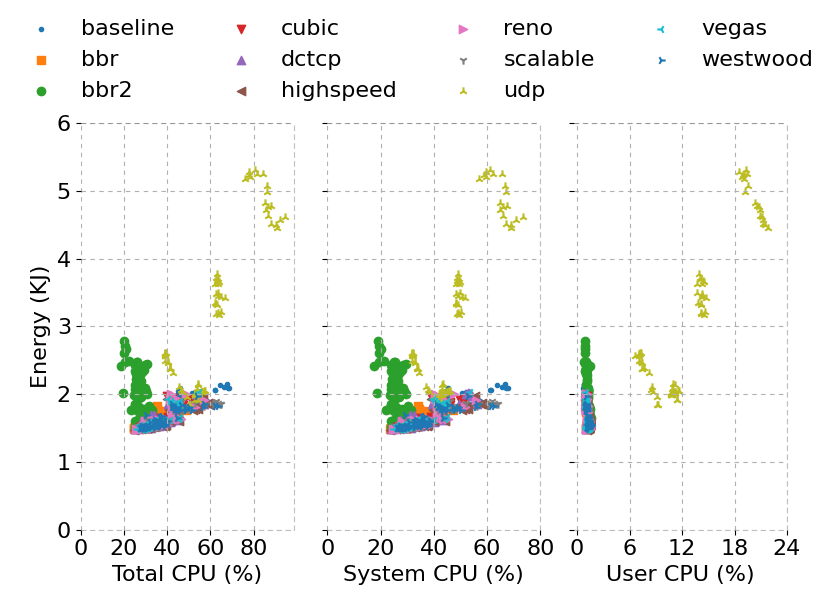

In [34]:
fig, ax = plt.subplots(1, 3, figsize=FIG_SIZE)

marker = 0
for cca, cc_df in exp_df.groupby('cc'):
    ax[0].scatter(cc_df['total_cpu_util_percent'], cc_df['energy_kJ'],
                marker=list(Line2D.markers.keys())[marker])
    marker += 1

ax[0].set_ylabel('Energy (KJ)', fontsize=FONT_SIZE)
ax[0].set_xlabel('Total CPU (%)', fontsize=FONT_SIZE)
ax[0].tick_params(axis='x', labelsize=FONT_SIZE)
ax[0].tick_params(axis='y', labelsize=FONT_SIZE)
ax[0].xaxis.set_ticks(np.arange(0, 81, 20))
ax[0].set_ylim(ENERGY_LIM)
ax[0].grid(linestyle=LINE_STYLE)
ax[0].spines["right"].set_linestyle(LINE_STYLE)
ax[0].spines["right"].set_alpha(0.5)
ax[0].spines["right"].set_color('gray')
ax[0].spines["left"].set_visible(False)
# ax[0].spines["left"].set_linestyle(LINE_STYLE)
# ax[0].spines["left"].set_alpha(0.5)
# ax[0].spines["left"].set_color('gray')
# ax[0].spines["top"].set_visible(False)
ax[0].spines["top"].set_linestyle(LINE_STYLE)
ax[0].spines["top"].set_alpha(0.5)
ax[0].spines["top"].set_color('gray')
ax[0].spines["bottom"].set_linestyle(LINE_STYLE)
ax[0].spines["bottom"].set_alpha(0.5)
ax[0].spines["bottom"].set_color('gray')

marker = 0
for cca, cc_df in exp_df.groupby('cc'):
    ax[1].scatter(cc_df['system_cpu_util_percent'], cc_df['energy_kJ'], 
                marker=list(Line2D.markers.keys())[marker])
    marker += 1

ax[1].set_xlabel('System CPU (%)', fontsize=FONT_SIZE)
ax[1].set_ylabel('')
ax[1].set_yticklabels([])
ax[1].tick_params(axis='x', labelsize=FONT_SIZE)
ax[1].xaxis.set_ticks(np.arange(0, 81, 20))
ax[1].set_ylim(ENERGY_LIM)
ax[1].grid(linestyle=LINE_STYLE)
ax[1].spines["right"].set_linestyle(LINE_STYLE)
ax[1].spines["right"].set_alpha(0.5)
ax[1].spines["right"].set_color('gray')
ax[1].spines["left"].set_visible(False)
# ax[1].spines["left"].set_linestyle(LINE_STYLE)
# ax[1].spines["left"].set_alpha(0.5)
# ax[1].spines["left"].set_color('gray')
# ax[1].spines["top"].set_visible(False)
ax[1].spines["top"].set_linestyle(LINE_STYLE)
ax[1].spines["top"].set_alpha(0.5)
ax[1].spines["top"].set_color('gray')
ax[1].spines["bottom"].set_linestyle(LINE_STYLE)
ax[1].spines["bottom"].set_alpha(0.5)
ax[1].spines["bottom"].set_color('gray')

marker = 0
for cca, cc_df in exp_df.groupby('cc'):
    ax[2].scatter(cc_df['user_cpu_util_percent'], cc_df['energy_kJ'], label=cca, 
                marker=list(Line2D.markers.keys())[marker])
    marker += 1

ax[2].set_xlabel('User CPU (%)', fontsize=FONT_SIZE)
ax[2].set_ylabel('')
ax[2].set_yticklabels([])
ax[2].tick_params(axis='x', labelsize=FONT_SIZE)
ax[2].xaxis.set_ticks(np.arange(0, 25, 6))
ax[2].set_ylim(ENERGY_LIM)
ax[2].grid(linestyle=LINE_STYLE)
ax[2].spines["right"].set_linestyle(LINE_STYLE)
ax[2].spines["right"].set_alpha(0.5)
ax[2].spines["right"].set_color('gray')
ax[2].spines["left"].set_visible(False)
# ax[2].spines["left"].set_linestyle(LINE_STYLE)
# ax[2].spines["left"].set_alpha(0.5)
# ax[2].spines["left"].set_color('gray')
# ax[2].spines["top"].set_visible(False)
ax[2].spines["top"].set_linestyle(LINE_STYLE)
ax[2].spines["top"].set_alpha(0.5)
ax[2].spines["top"].set_color('gray')
ax[2].spines["bottom"].set_linestyle(LINE_STYLE)
ax[2].spines["bottom"].set_alpha(0.5)
ax[2].spines["bottom"].set_color('gray')


lgd = fig.legend(loc='center', frameon=False, fontsize=FONT_SIZE, 
                 bbox_to_anchor=(0.5, 1.08), ncol=4)

plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_cpu_per_cca.pdf', 
                bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()


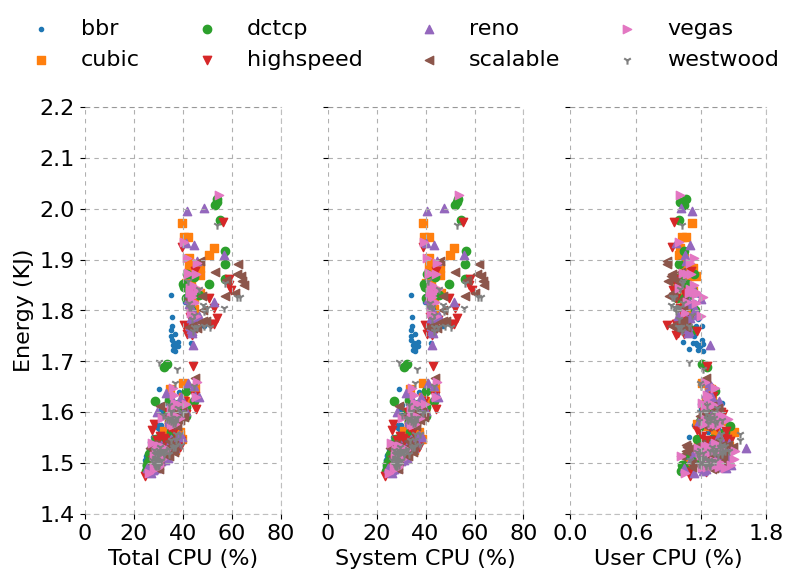

In [35]:
fig, ax = plt.subplots(1, 3, figsize=FIG_SIZE)

marker = 0
for cca, cc_df in exp_df_no_udp_no_bbr2_no_none.groupby('cc'):
    ax[0].scatter(cc_df['total_cpu_util_percent'], cc_df['energy_kJ'],
                marker=list(Line2D.markers.keys())[marker])
    marker += 1

ax[0].set_ylabel('Energy (KJ)', fontsize=FONT_SIZE)
ax[0].set_xlabel('Total CPU (%)', fontsize=FONT_SIZE)
ax[0].tick_params(axis='x', labelsize=FONT_SIZE)
ax[0].tick_params(axis='y', labelsize=FONT_SIZE)
ax[0].xaxis.set_ticks(np.arange(0, 81, 20))
ax[0].set_ylim(ENERGY_LIM_NO_UDP_NO_BBR2)
ax[0].grid(linestyle=LINE_STYLE)
ax[0].spines["right"].set_linestyle(LINE_STYLE)
ax[0].spines["right"].set_alpha(0.5)
ax[0].spines["right"].set_color('gray')
ax[0].spines["left"].set_visible(False)
# ax[0].spines["left"].set_linestyle(LINE_STYLE)
# ax[0].spines["left"].set_alpha(0.5)
# ax[0].spines["left"].set_color('gray')
# ax[0].spines["top"].set_visible(False)
ax[0].spines["top"].set_linestyle(LINE_STYLE)
ax[0].spines["top"].set_alpha(0.5)
ax[0].spines["top"].set_color('gray')
ax[0].spines["bottom"].set_linestyle(LINE_STYLE)
ax[0].spines["bottom"].set_alpha(0.5)
ax[0].spines["bottom"].set_color('gray')

marker = 0
for cca, cc_df in exp_df_no_udp_no_bbr2_no_none.groupby('cc'):
    ax[1].scatter(cc_df['system_cpu_util_percent'], cc_df['energy_kJ'], 
                marker=list(Line2D.markers.keys())[marker])
    marker += 1

ax[1].set_xlabel('System CPU (%)', fontsize=FONT_SIZE)
ax[1].set_ylabel('')
ax[1].set_yticklabels([])
ax[1].tick_params(axis='x', labelsize=FONT_SIZE)
ax[1].xaxis.set_ticks(np.arange(0, 81, 20))
ax[1].set_ylim(ENERGY_LIM_NO_UDP_NO_BBR2)
ax[1].grid(linestyle=LINE_STYLE)
ax[1].spines["right"].set_linestyle(LINE_STYLE)
ax[1].spines["right"].set_alpha(0.5)
ax[1].spines["right"].set_color('gray')
ax[1].spines["left"].set_visible(False)
# ax[1].spines["left"].set_linestyle(LINE_STYLE)
# ax[1].spines["left"].set_alpha(0.5)
# ax[1].spines["left"].set_color('gray')
# ax[1].spines["top"].set_visible(False)
ax[1].spines["top"].set_linestyle(LINE_STYLE)
ax[1].spines["top"].set_alpha(0.5)
ax[1].spines["top"].set_color('gray')
ax[1].spines["bottom"].set_linestyle(LINE_STYLE)
ax[1].spines["bottom"].set_alpha(0.5)
ax[1].spines["bottom"].set_color('gray')

marker = 0
for cca, cc_df in exp_df_no_udp_no_bbr2_no_none.groupby('cc'):
    ax[2].scatter(cc_df['user_cpu_util_percent'], cc_df['energy_kJ'], label=cca, 
                marker=list(Line2D.markers.keys())[marker])
    marker += 1

ax[2].set_xlabel('User CPU (%)', fontsize=FONT_SIZE)
ax[2].set_ylabel('')
ax[2].set_yticklabels([])
ax[2].tick_params(axis='x', labelsize=FONT_SIZE)
ax[2].xaxis.set_ticks(np.arange(0, 2.1, 0.6))
ax[2].set_ylim(ENERGY_LIM_NO_UDP_NO_BBR2)
ax[2].grid(linestyle=LINE_STYLE)
ax[2].spines["right"].set_linestyle(LINE_STYLE)
ax[2].spines["right"].set_alpha(0.5)
ax[2].spines["right"].set_color('gray')
ax[2].spines["left"].set_visible(False)
# ax[2].spines["left"].set_linestyle(LINE_STYLE)
# ax[2].spines["left"].set_alpha(0.5)
# ax[2].spines["left"].set_color('gray')
# ax[2].spines["top"].set_visible(False)
ax[2].spines["top"].set_linestyle(LINE_STYLE)
ax[2].spines["top"].set_alpha(0.5)
ax[2].spines["top"].set_color('gray')
ax[2].spines["bottom"].set_linestyle(LINE_STYLE)
ax[2].spines["bottom"].set_alpha(0.5)
ax[2].spines["bottom"].set_color('gray')


lgd = fig.legend(loc='center', frameon=False, fontsize=FONT_SIZE, 
                 bbox_to_anchor=(0.5, 1.08), ncol=4)

plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_cpu_per_cca_no_udp_no_bbr2_no_none.pdf', 
                bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()


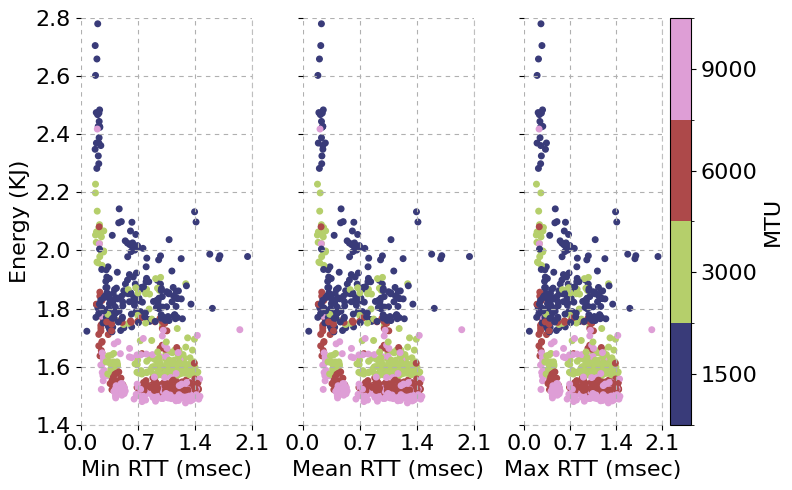

In [36]:
fig, ax = plt.subplots(1, 3)

exp_df.plot.scatter(y='energy_kJ', x='min_rtt', c='mtu', 
                    colormap=cmap, norm=norm, s=16, ax=ax[0], colorbar=False)

ax[0].set_ylabel('Energy (KJ)', fontsize=FONT_SIZE)
ax[0].set_xlabel('Min RTT (msec)', fontsize=FONT_SIZE)
ax[0].tick_params(axis='x', labelsize=FONT_SIZE)
ax[0].tick_params(axis='y', labelsize=FONT_SIZE)
ax[0].xaxis.set_ticks(np.arange(0, 2.2, 0.7))
ax[0].set_xlim((0, 2.1))
ax[0].set_ylim(ENERGY_LIM_NO_UDP)
ax[0].grid(linestyle=LINE_STYLE)
ax[0].spines["right"].set_linestyle(LINE_STYLE)
ax[0].spines["right"].set_alpha(0.5)
ax[0].spines["right"].set_color('gray')
ax[0].spines["left"].set_visible(False)
# ax[0].spines["left"].set_linestyle(LINE_STYLE)
# ax[0].spines["left"].set_alpha(0.5)
# ax[0].spines["left"].set_color('gray')
ax[0].spines["top"].set_visible(False)
ax[0].spines["bottom"].set_linestyle(LINE_STYLE)
ax[0].spines["bottom"].set_alpha(0.5)
ax[0].spines["bottom"].set_color('gray')

exp_df.plot.scatter(y='energy_kJ', x='mean_rtt', c='mtu', 
                    colormap=cmap, norm=norm, s=16, ax=ax[1], colorbar=False)

ax[1].set_xlabel('Mean RTT (msec)', fontsize=FONT_SIZE)
ax[1].set_ylabel('')
ax[1].set_yticklabels([])
ax[1].tick_params(axis='x', labelsize=FONT_SIZE)
ax[1].xaxis.set_ticks(np.arange(0, 2.2, 0.7))
ax[1].set_xlim((0, 2.1))
ax[1].set_ylim(ENERGY_LIM_NO_UDP)
ax[1].grid(linestyle=LINE_STYLE)
ax[1].spines["right"].set_linestyle(LINE_STYLE)
ax[1].spines["right"].set_alpha(0.5)
ax[1].spines["right"].set_color('gray')
ax[1].spines["left"].set_visible(False)
# ax[1].spines["left"].set_linestyle(LINE_STYLE)
# ax[1].spines["left"].set_alpha(0.5)
# ax[1].spines["left"].set_color('gray')
ax[1].spines["top"].set_visible(False)
ax[1].spines["bottom"].set_linestyle(LINE_STYLE)
ax[1].spines["bottom"].set_alpha(0.5)
ax[1].spines["bottom"].set_color('gray')

exp_df.plot.scatter(y='energy_kJ', x='max_rtt', c='mtu', 
                    colormap=cmap, norm=norm, s=16, ax=ax[2])

ax[2].set_xlabel('Max RTT (msec)', fontsize=FONT_SIZE)
ax[2].set_ylabel('')
ax[2].set_yticklabels([])

cbar = plt.get_cmap()
cbar_ax = plt.gcf().get_axes()[-1]
cbar_ax.get_yaxis().set_ticks(mtus)
cbar_ax.set_yticklabels(labels=mtus, fontsize=FONT_SIZE)
cbar_ax.set_ylabel('MTU',size=FONT_SIZE)

ax[2].tick_params(axis='x', labelsize=FONT_SIZE)
ax[2].xaxis.set_ticks(np.arange(0, 2.2, 0.7))
ax[2].set_xlim((0, 2.1))
ax[2].set_ylim(ENERGY_LIM_NO_UDP)
ax[2].grid(linestyle=LINE_STYLE)
ax[2].spines["right"].set_linestyle(LINE_STYLE)
ax[2].spines["right"].set_alpha(0.5)
ax[2].spines["right"].set_color('gray')
ax[2].spines["left"].set_visible(False)
# ax[2].spines["left"].set_linestyle(LINE_STYLE)
# ax[2].spines["left"].set_alpha(0.5)
# ax[2].spines["left"].set_color('gray')
ax[2].spines["top"].set_visible(False)
ax[2].spines["bottom"].set_linestyle(LINE_STYLE)
ax[2].spines["bottom"].set_alpha(0.5)
ax[2].spines["bottom"].set_color('gray')

plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_rtt_per_mtu.pdf')

plt.show()


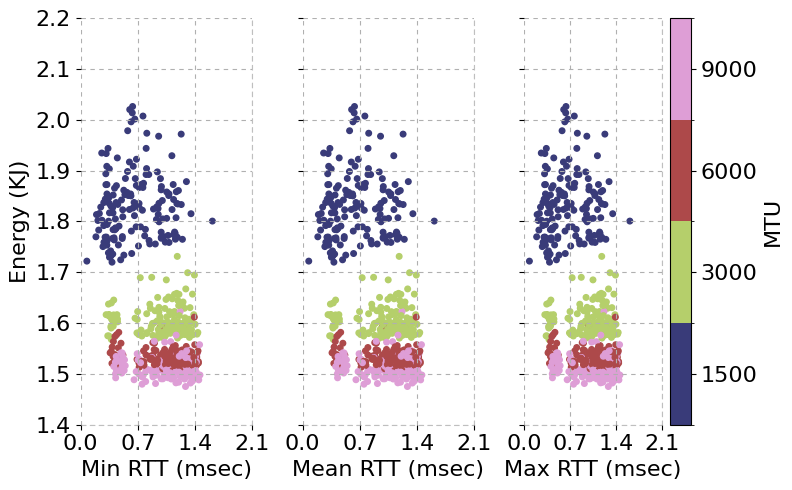

In [37]:
fig, ax = plt.subplots(1, 3)

exp_df_no_udp_no_bbr2_no_none.plot.scatter(y='energy_kJ', x='min_rtt', c='mtu', 
                    colormap=cmap, norm=norm, s=16, ax=ax[0], colorbar=False)

ax[0].set_ylabel('Energy (KJ)', fontsize=FONT_SIZE)
ax[0].set_xlabel('Min RTT (msec)', fontsize=FONT_SIZE)
ax[0].tick_params(axis='x', labelsize=FONT_SIZE)
ax[0].tick_params(axis='y', labelsize=FONT_SIZE)
ax[0].xaxis.set_ticks(np.arange(0, 2.2, 0.7))
ax[0].set_xlim((0, 2.1))
ax[0].set_ylim(ENERGY_LIM_NO_UDP_NO_BBR2)
ax[0].grid(linestyle=LINE_STYLE)
ax[0].spines["right"].set_linestyle(LINE_STYLE)
ax[0].spines["right"].set_alpha(0.5)
ax[0].spines["right"].set_color('gray')
ax[0].spines["left"].set_visible(False)
# ax[0].spines["left"].set_linestyle(LINE_STYLE)
# ax[0].spines["left"].set_alpha(0.5)
# ax[0].spines["left"].set_color('gray')
ax[0].spines["top"].set_visible(False)
ax[0].spines["bottom"].set_linestyle(LINE_STYLE)
ax[0].spines["bottom"].set_alpha(0.5)
ax[0].spines["bottom"].set_color('gray')

exp_df_no_udp_no_bbr2_no_none.plot.scatter(y='energy_kJ', x='mean_rtt', c='mtu', 
                    colormap=cmap, norm=norm, s=16, ax=ax[1], colorbar=False)

ax[1].set_xlabel('Mean RTT (msec)', fontsize=FONT_SIZE)
ax[1].set_ylabel('')
ax[1].set_yticklabels([])
ax[1].tick_params(axis='x', labelsize=FONT_SIZE)
ax[1].xaxis.set_ticks(np.arange(0, 2.2, 0.7))
ax[1].set_xlim((0, 2.1))
ax[1].set_ylim(ENERGY_LIM_NO_UDP_NO_BBR2)
ax[1].grid(linestyle=LINE_STYLE)
ax[1].spines["right"].set_linestyle(LINE_STYLE)
ax[1].spines["right"].set_alpha(0.5)
ax[1].spines["right"].set_color('gray')
ax[1].spines["left"].set_visible(False)
# ax[1].spines["left"].set_linestyle(LINE_STYLE)
# ax[1].spines["left"].set_alpha(0.5)
# ax[1].spines["left"].set_color('gray')
ax[1].spines["top"].set_visible(False)
ax[1].spines["bottom"].set_linestyle(LINE_STYLE)
ax[1].spines["bottom"].set_alpha(0.5)
ax[1].spines["bottom"].set_color('gray')

exp_df_no_udp_no_bbr2_no_none.plot.scatter(y='energy_kJ', x='max_rtt', c='mtu', 
                    colormap=cmap, norm=norm, s=16, ax=ax[2])

ax[2].set_xlabel('Max RTT (msec)', fontsize=FONT_SIZE)
ax[2].set_ylabel('')
ax[2].set_yticklabels([])

cbar = plt.get_cmap()
cbar_ax = plt.gcf().get_axes()[-1]
cbar_ax.get_yaxis().set_ticks(mtus)
cbar_ax.set_yticklabels(labels=mtus, fontsize=FONT_SIZE)
cbar_ax.set_ylabel('MTU',size=FONT_SIZE)

ax[2].tick_params(axis='x', labelsize=FONT_SIZE)
ax[2].xaxis.set_ticks(np.arange(0, 2.2, 0.7))
ax[2].set_xlim((0, 2.1))
ax[2].set_ylim(ENERGY_LIM_NO_UDP_NO_BBR2)
ax[2].grid(linestyle=LINE_STYLE)
ax[2].spines["right"].set_linestyle(LINE_STYLE)
ax[2].spines["right"].set_alpha(0.5)
ax[2].spines["right"].set_color('gray')
ax[2].spines["left"].set_visible(False)
# ax[2].spines["left"].set_linestyle(LINE_STYLE)
# ax[2].spines["left"].set_alpha(0.5)
# ax[2].spines["left"].set_color('gray')
ax[2].spines["top"].set_visible(False)
ax[2].spines["bottom"].set_linestyle(LINE_STYLE)
ax[2].spines["bottom"].set_alpha(0.5)
ax[2].spines["bottom"].set_color('gray')

plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_rtt_per_mtu_no_bbr2_no_none.pdf')

plt.show()


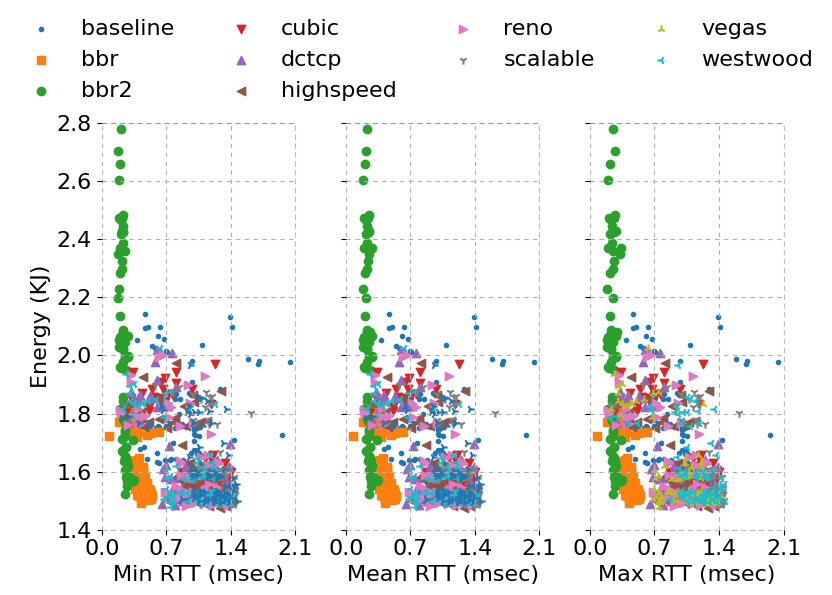

In [38]:
fig, ax = plt.subplots(1, 3, figsize=FIG_SIZE)

marker = 0
for cca, cc_df in exp_df.groupby('cc'):
    ax[0].scatter(cc_df['min_rtt'], cc_df['energy_kJ'],
                marker=list(Line2D.markers.keys())[marker])
    marker += 1

ax[0].set_ylabel('Energy (KJ)', fontsize=FONT_SIZE)
ax[0].set_xlabel('Min RTT (msec)', fontsize=FONT_SIZE)
ax[0].tick_params(axis='x', labelsize=FONT_SIZE)
ax[0].tick_params(axis='y', labelsize=FONT_SIZE)
ax[0].xaxis.set_ticks(np.arange(0, 2.2, 0.7))
ax[0].set_xlim((0, 2.1))
ax[0].set_ylim(ENERGY_LIM_NO_UDP)
ax[0].grid(linestyle=LINE_STYLE)
ax[0].spines["right"].set_linestyle(LINE_STYLE)
ax[0].spines["right"].set_alpha(0.5)
ax[0].spines["right"].set_color('gray')
ax[0].spines["left"].set_visible(False)
# ax[0].spines["left"].set_linestyle(LINE_STYLE)
# ax[0].spines["left"].set_alpha(0.5)
# ax[0].spines["left"].set_color('gray')
# ax[0].spines["top"].set_visible(False)
ax[0].spines["top"].set_linestyle(LINE_STYLE)
ax[0].spines["top"].set_alpha(0.5)
ax[0].spines["top"].set_color('gray')
ax[0].spines["bottom"].set_linestyle(LINE_STYLE)
ax[0].spines["bottom"].set_alpha(0.5)
ax[0].spines["bottom"].set_color('gray')

marker = 0
for cca, cc_df in exp_df.groupby('cc'):
    ax[1].scatter(cc_df['mean_rtt'], cc_df['energy_kJ'], 
                marker=list(Line2D.markers.keys())[marker])
    marker += 1

ax[1].set_xlabel('Mean RTT (msec)', fontsize=FONT_SIZE)
ax[1].set_ylabel('')
ax[1].set_yticklabels([])
ax[1].tick_params(axis='x', labelsize=FONT_SIZE)
ax[1].xaxis.set_ticks(np.arange(0, 2.2, 0.7))
ax[1].set_xlim((0, 2.1))
ax[1].set_ylim(ENERGY_LIM_NO_UDP)
ax[1].grid(linestyle=LINE_STYLE)
ax[1].spines["right"].set_linestyle(LINE_STYLE)
ax[1].spines["right"].set_alpha(0.5)
ax[1].spines["right"].set_color('gray')
ax[1].spines["left"].set_visible(False)
# ax[1].spines["left"].set_linestyle(LINE_STYLE)
# ax[1].spines["left"].set_alpha(0.5)
# ax[1].spines["left"].set_color('gray')
# ax[1].spines["top"].set_visible(False)
ax[1].spines["top"].set_linestyle(LINE_STYLE)
ax[1].spines["top"].set_alpha(0.5)
ax[1].spines["top"].set_color('gray')
ax[1].spines["bottom"].set_linestyle(LINE_STYLE)
ax[1].spines["bottom"].set_alpha(0.5)
ax[1].spines["bottom"].set_color('gray')

marker = 0
for cca, cc_df in exp_df.groupby('cc'):
    if (cca == 'udp'):
        continue
    ax[2].scatter(cc_df['max_rtt'], cc_df['energy_kJ'], label=cca, 
                marker=list(Line2D.markers.keys())[marker])
    marker += 1

ax[2].set_xlabel('Max RTT (msec)', fontsize=FONT_SIZE)
ax[2].set_ylabel('')
ax[2].set_yticklabels([])
ax[2].tick_params(axis='x', labelsize=FONT_SIZE)
ax[2].xaxis.set_ticks(np.arange(0, 2.2, 0.7))
ax[2].set_xlim((0, 2.1))
ax[2].set_ylim(ENERGY_LIM_NO_UDP)
ax[2].grid(linestyle=LINE_STYLE)
ax[2].spines["right"].set_linestyle(LINE_STYLE)
ax[2].spines["right"].set_alpha(0.5)
ax[2].spines["right"].set_color('gray')
ax[2].spines["left"].set_visible(False)
# ax[2].spines["left"].set_linestyle(LINE_STYLE)
# ax[2].spines["left"].set_alpha(0.5)
# ax[2].spines["left"].set_color('gray')
# ax[2].spines["top"].set_visible(False)
ax[2].spines["top"].set_linestyle(LINE_STYLE)
ax[2].spines["top"].set_alpha(0.5)
ax[2].spines["top"].set_color('gray')
ax[2].spines["bottom"].set_linestyle(LINE_STYLE)
ax[2].spines["bottom"].set_alpha(0.5)
ax[2].spines["bottom"].set_color('gray')


lgd = fig.legend(loc='center', frameon=False, fontsize=FONT_SIZE, 
                 bbox_to_anchor=(0.5, 1.08), ncol=4)

plt.tight_layout()

if (SAVE_FIG):
    plt.savefig(out_dir + '/energy_vs_rtt_per_cca.pdf', 
                bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()

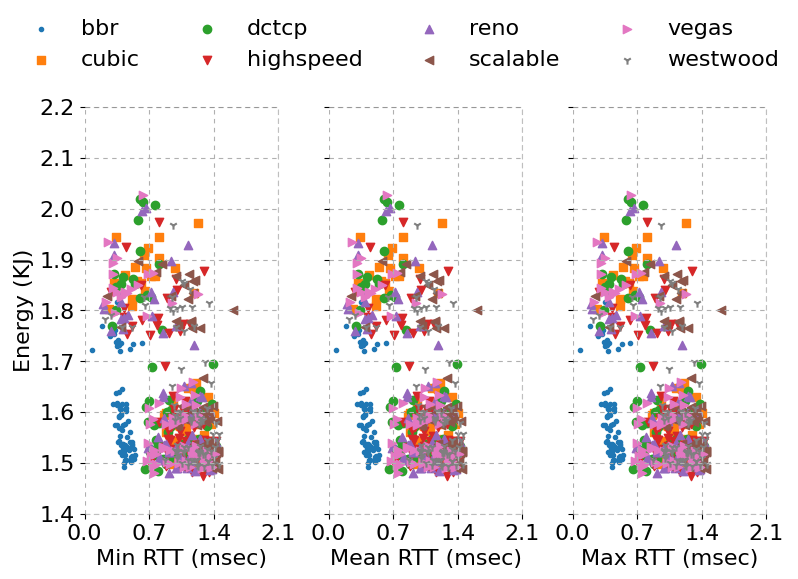

In [39]:
fig, ax = plt.subplots(1, 3, figsize=FIG_SIZE)

marker = 0
for cca, cc_df in exp_df_no_udp_no_bbr2_no_none.groupby('cc'):
    ax[0].scatter(cc_df['min_rtt'], cc_df['energy_kJ'],
                marker=list(Line2D.markers.keys())[marker])
    marker += 1

ax[0].set_ylabel('Energy (KJ)', fontsize=FONT_SIZE)
ax[0].set_xlabel('Min RTT (msec)', fontsize=FONT_SIZE)
ax[0].tick_params(axis='x', labelsize=FONT_SIZE)
ax[0].tick_params(axis='y', labelsize=FONT_SIZE)
ax[0].xaxis.set_ticks(np.arange(0, 2.2, 0.7))
ax[0].set_xlim((0, 2.1))
ax[0].set_ylim(ENERGY_LIM_NO_UDP_NO_BBR2)
ax[0].grid(linestyle=LINE_STYLE)
ax[0].spines["right"].set_linestyle(LINE_STYLE)
ax[0].spines["right"].set_alpha(0.5)
ax[0].spines["right"].set_color('gray')
ax[0].spines["left"].set_visible(False)
# ax[0].spines["left"].set_linestyle(LINE_STYLE)
# ax[0].spines["left"].set_alpha(0.5)
# ax[0].spines["left"].set_color('gray')
# ax[0].spines["top"].set_visible(False)
ax[0].spines["top"].set_linestyle(LINE_STYLE)
ax[0].spines["top"].set_alpha(0.5)
ax[0].spines["top"].set_color('gray')
ax[0].spines["bottom"].set_linestyle(LINE_STYLE)
ax[0].spines["bottom"].set_alpha(0.5)
ax[0].spines["bottom"].set_color('gray')

marker = 0
for cca, cc_df in exp_df_no_udp_no_bbr2_no_none.groupby('cc'):
    ax[1].scatter(cc_df['mean_rtt'], cc_df['energy_kJ'], 
                marker=list(Line2D.markers.keys())[marker])
    marker += 1

ax[1].set_xlabel('Mean RTT (msec)', fontsize=FONT_SIZE)
ax[1].set_ylabel('')
ax[1].set_yticklabels([])
ax[1].tick_params(axis='x', labelsize=FONT_SIZE)
ax[1].xaxis.set_ticks(np.arange(0, 2.2, 0.7))
ax[1].set_xlim((0, 2.1))
ax[1].set_ylim(ENERGY_LIM_NO_UDP_NO_BBR2)
ax[1].grid(linestyle=LINE_STYLE)
ax[1].spines["right"].set_linestyle(LINE_STYLE)
ax[1].spines["right"].set_alpha(0.5)
ax[1].spines["right"].set_color('gray')
ax[1].spines["left"].set_visible(False)
# ax[1].spines["left"].set_linestyle(LINE_STYLE)
# ax[1].spines["left"].set_alpha(0.5)
# ax[1].spines["left"].set_color('gray')
# ax[1].spines["top"].set_visible(False)
ax[1].spines["top"].set_linestyle(LINE_STYLE)
ax[1].spines["top"].set_alpha(0.5)
ax[1].spines["top"].set_color('gray')
ax[1].spines["bottom"].set_linestyle(LINE_STYLE)
ax[1].spines["bottom"].set_alpha(0.5)
ax[1].spines["bottom"].set_color('gray')

marker = 0
for cca, cc_df in exp_df_no_udp_no_bbr2_no_none.groupby('cc'):
    ax[2].scatter(cc_df['max_rtt'], cc_df['energy_kJ'], label=cca, 
                marker=list(Line2D.markers.keys())[marker])
    marker += 1

ax[2].set_xlabel('Max RTT (msec)', fontsize=FONT_SIZE)
ax[2].set_ylabel('')
ax[2].set_yticklabels([])
ax[2].tick_params(axis='x', labelsize=FONT_SIZE)
ax[2].xaxis.set_ticks(np.arange(0, 2.2, 0.7))
ax[2].set_xlim((0, 2.1))
ax[2].set_ylim(ENERGY_LIM_NO_UDP_NO_BBR2)
ax[2].grid(linestyle=LINE_STYLE)
ax[2].spines["right"].set_linestyle(LINE_STYLE)
ax[2].spines["right"].set_alpha(0.5)
ax[2].spines["right"].set_color('gray')
ax[2].spines["left"].set_visible(False)
# ax[2].spines["left"].set_linestyle(LINE_STYLE)
# ax[2].spines["left"].set_alpha(0.5)
# ax[2].spines["left"].set_color('gray')
# ax[2].spines["top"].set_visible(False)
ax[2].spines["top"].set_linestyle(LINE_STYLE)
ax[2].spines["top"].set_alpha(0.5)
ax[2].spines["top"].set_color('gray')
ax[2].spines["bottom"].set_linestyle(LINE_STYLE)
ax[2].spines["bottom"].set_alpha(0.5)
ax[2].spines["bottom"].set_color('gray')


lgd = fig.legend(loc='center', frameon=False, fontsize=FONT_SIZE, 
                 bbox_to_anchor=(0.5, 1.08), ncol=4)

plt.tight_layout()

if (SAVE_FIG):
    plt.savefig(out_dir + '/energy_vs_rtt_per_cca_no_bbr2_no_none.pdf', 
                bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()